Name1 = Mohamed Bassem  Id = 2003731
Name2 = Mina Ehab       Id = 2005830    


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Research Question

## Mohamed Bassem merge(appearances,players)

1- Is there a correlation between a player's market value and their on-field contributions (goals, assists), taking into account player minute_played ?                                                                  

2-Is there a relationship between a player's market value, their contract expiration date, and their current club name?

In [ ]:
df_appearances = pd.read_csv("/content/appearances.csv", low_memory=False)
df_players = pd.read_csv("/content/players.csv")
df_appearances_backup = df_appearances.copy()

In [ ]:
df_appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520680,4244600_576024,4244600,576024,281,281,2023-12-22,Julián Álvarez,KLUB,0,0,2,1,90
1520681,4244600_601883,4244600,601883,281,281,2023-12-22,Matheus Nunes,KLUB,0,0,0,1,9
1520682,4244600_661207,4244600,661207,281,281,2023-12-22,Oscar Bobb,KLUB,0,0,0,0,9
1520683,4244600_701057,4244600,701057,281,281,2023-12-22,Rico Lewis,KLUB,0,0,0,0,61


In [ ]:
df_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30326,1163778,Kahveh,Zahiroleslam,Kahveh Zahiroleslam,2023,475,kahveh-zahiroleslam,United States,"Saratoga, California",United States,...,right,193.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kahveh-zahirol...,BE1,Koninklijke Sint-Truidense Voetbalvereniging,400000.0,400000.0
30327,1166093,Georgios,Konstantakopoulos,Georgios Konstantakopoulos,2023,30120,georgios-konstantakopoulos,NaN,NaN,Greece,...,both,182.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/georgios-konst...,GR1,Athlitiki Enosi Kifisias,100000.0,100000.0
30328,1173042,Djibi,Seck,Djibi Seck,2023,601,djibi-seck,NaN,NaN,Senegal,...,NaN,NaN,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/djibi-seck/pro...,BE1,Koninklijke Voetbalclub Kortrijk,150000.0,150000.0
30329,1176345,Mahamadou,Nagida,Mahamadou Nagida,2023,273,mahamadou-nagida,Cameroon,Douala,Cameroon,...,left,176.0,2028-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mahamadou-nagi...,FR1,Stade Rennais Football Club,150000.0,150000.0


# Data Cleaning

This code checks count of the missing value in each data Frame specifically and return it and also gets the percentage

In [ ]:
# columns with the most missing values
def print_columns_with_missing_values(df, df_name):
    missing_values = df.isnull().sum()
    total_rows = df.shape[0]
    missing_percentage = (missing_values / total_rows) * 100
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': missing_values,
        'Missing Percentage': missing_percentage
    })

    # Sort by Missing Percentage in descending order
    missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
    print(f"Columns with the most missing values in {df_name}:")
    print(missing_data.head())

print_columns_with_missing_values(df_appearances, 'df_appearances')
print_columns_with_missing_values(df_players, 'df_players')


Columns with the most missing values in df_appearances:
                        Column  Missing Values  Missing Percentage
player_name        player_name             324            0.021306
appearance_id    appearance_id               0            0.000000
game_id                game_id               0            0.000000
player_id            player_id               0            0.000000
player_club_id  player_club_id               0            0.000000
Columns with the most missing values in df_players:
                                            Column  Missing Values  \
agent_name                              agent_name           15337   
contract_expiration_date  contract_expiration_date           11442   
country_of_birth                  country_of_birth            2679   
foot                                          foot            2380   
city_of_birth                        city_of_birth            2190   

                          Missing Percentage  
agent_name            

Since we are not going to use this column and it has 50% of missing values and it cannot be predicted we are going to drop it ("agent_name").

In [ ]:
df_players = df_players.drop(columns=['agent_name'])

Drop missing values from each DataFrame

In [ ]:
df_appearances = df_appearances.dropna()
df_players = df_players.dropna()

Print the shapes of the cleaned DataFrames

In [ ]:
print( df_appearances.shape)
print( df_players.shape)


Shape of df_appearances after dropping missing values: (1520361, 13)
Shape of df_players after dropping missing values: (15060, 22)


Remove the duplicated rows "No duplicated rows were found !!"


In [ ]:
df_appearances_no_duplicates = df_appearances.drop_duplicates(keep='first')

# Print the shape before and after removing duplicate rows
print(df_appearances.shape)
print( df_appearances_no_duplicates.shape)

Shape of df_appearances before removing duplicate rows: (1520361, 13)
Shape of df_appearances after removing duplicate rows: (1520361, 13)


In [ ]:
df_players_no_duplicates = df_players.drop_duplicates(keep='first')

# Print the shape before and after removing duplicate rows
print(df_players.shape)
print(df_players_no_duplicates.shape)


Shape of df_players before removing duplicate rows: (15060, 22)
Shape of df_players after removing duplicate rows: (15060, 22)


Drop the columns that we are not going to use in players csv

In [ ]:
df_players = df_players.drop(columns=['image_url'])
df_players = df_players.drop(columns=['url'])
df_players = df_players.drop(columns=['country_of_birth'])
df_players = df_players.drop(columns=['city_of_birth'])
df_players = df_players.drop(columns=['player_code'])

Drop the columns that we are not going to use in appearances csv

In [ ]:
df_appearances = df_appearances.drop(columns=['appearance_id'])
df_appearances = df_appearances.drop(columns=['game_id'])
df_appearances = df_appearances.drop(columns=['yellow_cards'])
df_appearances = df_appearances.drop(columns=['red_cards'])

# Data Integration

In [ ]:
# Merge df_appearances with df_players based on player_id
df_integrated = df_appearances.merge(df_players, on='player_id', how='left')

print("Shape of df_integrated:", df_integrated.shape)
df_integrated.head()


Shape of df_integrated: (1520361, 25)


,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,goals,assists,minutes_played,first_name,...,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,2,0,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,45,Sander,...,1988-05-07,Central Midfield,Midfield,right,177.0,2023-12-31 00:00:00,SC1,Saint Mirren Football Club,100000.0,600000.0
3,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,90,Vegar,...,1991-06-26,Right-Back,Defender,right,178.0,2024-12-31 00:00:00,TR1,Fatih Karagümrük Sportif Faaliyetler San. Tic....,350000.0,1500000.0
4,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,1,90,Markus,...,1992-07-25,Centre-Back,Defender,right,187.0,2024-12-31 00:00:00,GB1,Hull City,800000.0,5000000.0


Removing the null rows from the intgrated csv

In [ ]:
# Remove rows with null values
df_integrated_no_null = df_integrated.dropna()

# Print the shape before and after removing null values
print( df_integrated.shape)
print( df_integrated_no_null.shape)


Shape of df_integrated before removing null values: (1520361, 25)
Shape of df_integrated after removing null values: (941348, 25)


This section to know the the min and the max values so we can undestand the visulization of the research questions .

In [ ]:
# Get the maximum and minimum values of Market Value (in Euros)
max_market_value = df_integrated['market_value_in_eur'].max()
min_market_value = df_integrated['market_value_in_eur'].min()

print(f"Maximum Market Value: {max_market_value} Euros")
print(f"Minimum Market Value: {min_market_value} Euros")


# Research question 1

<ipython-input-66-890a85802373>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='minutes_played_range', y='goals', hue='market_value_range', data=average_goals, ci=None, palette='viridis')


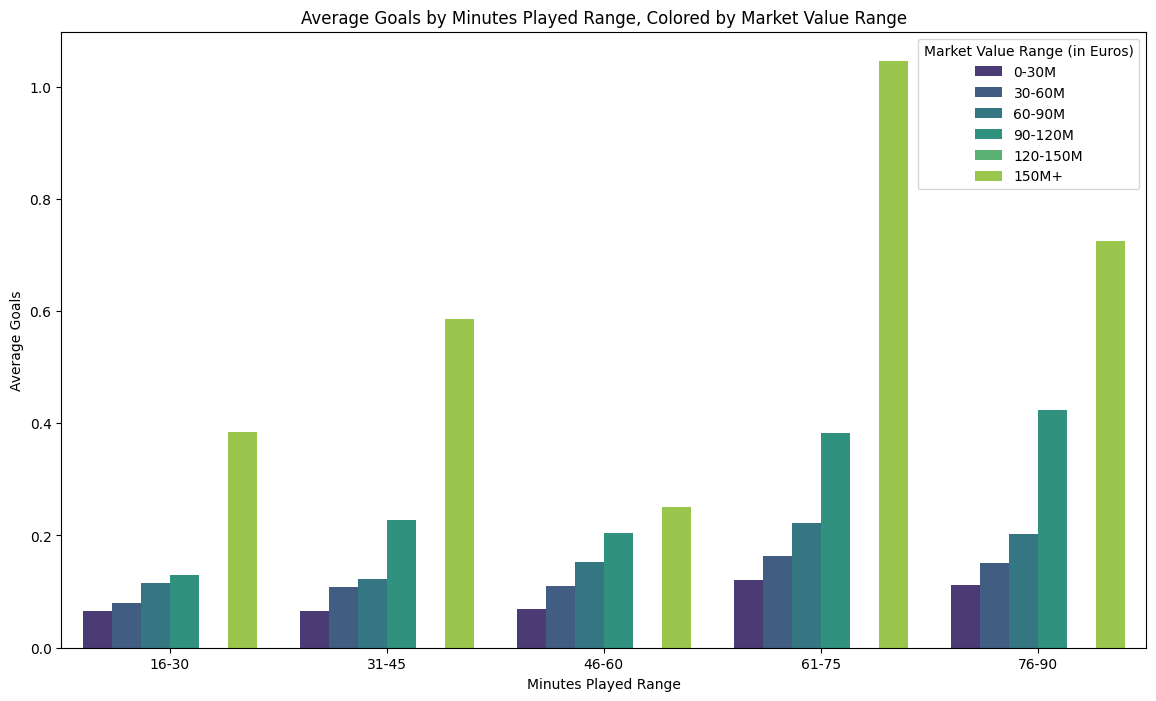

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for minutes played range
df_integrated['minutes_played_range'] = pd.cut(df_integrated['minutes_played'], bins=[15, 30, 45, 60, 75, 90], labels=['16-30', '31-45', '46-60', '61-75', '76-90'])

# Create bins for market values
value_bins = [0, 30000000, 60000000, 90000000, 120000000, 150000000, float('inf')]
value_labels = ['0-30M', '30-60M', '60-90M', '90-120M', '120-150M', '150M+']
df_integrated['market_value_range'] = pd.cut(df_integrated['market_value_in_eur'], bins=value_bins, labels=value_labels)

# Calculate the average goals for each range of minutes played and market value range
average_goals = df_integrated.groupby(['minutes_played_range', 'market_value_range'])['goals'].mean().reset_index()

# Bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='minutes_played_range', y='goals', hue='market_value_range', data=average_goals, ci=None, palette='viridis')

# Add labels and title
plt.xlabel('Minutes Played Range')
plt.ylabel('Average Goals')
plt.title('Average Goals by Minutes Played Range, Colored by Market Value Range')
plt.legend(title='Market Value Range (in Euros)')

plt.show()

Insights on the visulization of research Q1

The bar plot illustrates the total number of goals scored by football players across various ranges of minutes played, with each bar further segmented by different market value tiers. The visualization allows for a rapid assessment of goal distribution within specific intervals of playing time, offering insights into players' goal-scoring behavior. By color-coding bars based on market value, the plot provides a visual correlation between players' valuation and their goal contributions.from plot as you can that players with higher market value tends to be the players whom most scores and different timing in the match meaning that the market value and the goals are directly proportional the more the market value the more the goals scored in different times of the match

# Research Question (2)

Research contains the varible that has alot of values so i choose to make the visuliazation on the 10 ten teams that has number of players in the csv

In [ ]:
# Get the top 10 most frequently occurring club names
top_10_clubs = df_integrated['current_club_name'].value_counts().head(10)

print("Top 10 Most Frequently Occurring Club Names:")
print(top_10_clubs)


Top 10 Most Frequently Occurring Club Names:
Football Club Internazionale Milano S.p.A.    7367
Club Atlético de Madrid S.A.D.                7040
Manchester United Football Club               6711
Sevilla Fútbol Club S.A.D.                    6601
Villarreal Club de Fútbol S.A.D.              6454
FC Bayern München                             6339
Associazione Sportiva Roma                    6098
Galatasaray Spor Kulübü                       6046
Futbol Club Barcelona                         6037
Real Madrid Club de Fútbol                    5928
Name: current_club_name, dtype: int64


<ipython-input-64-c16a91da47c6>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='current_club_name', y='market_value_in_eur', hue='years_left_on_contract', data=df_top_10_clubs, ci=None)


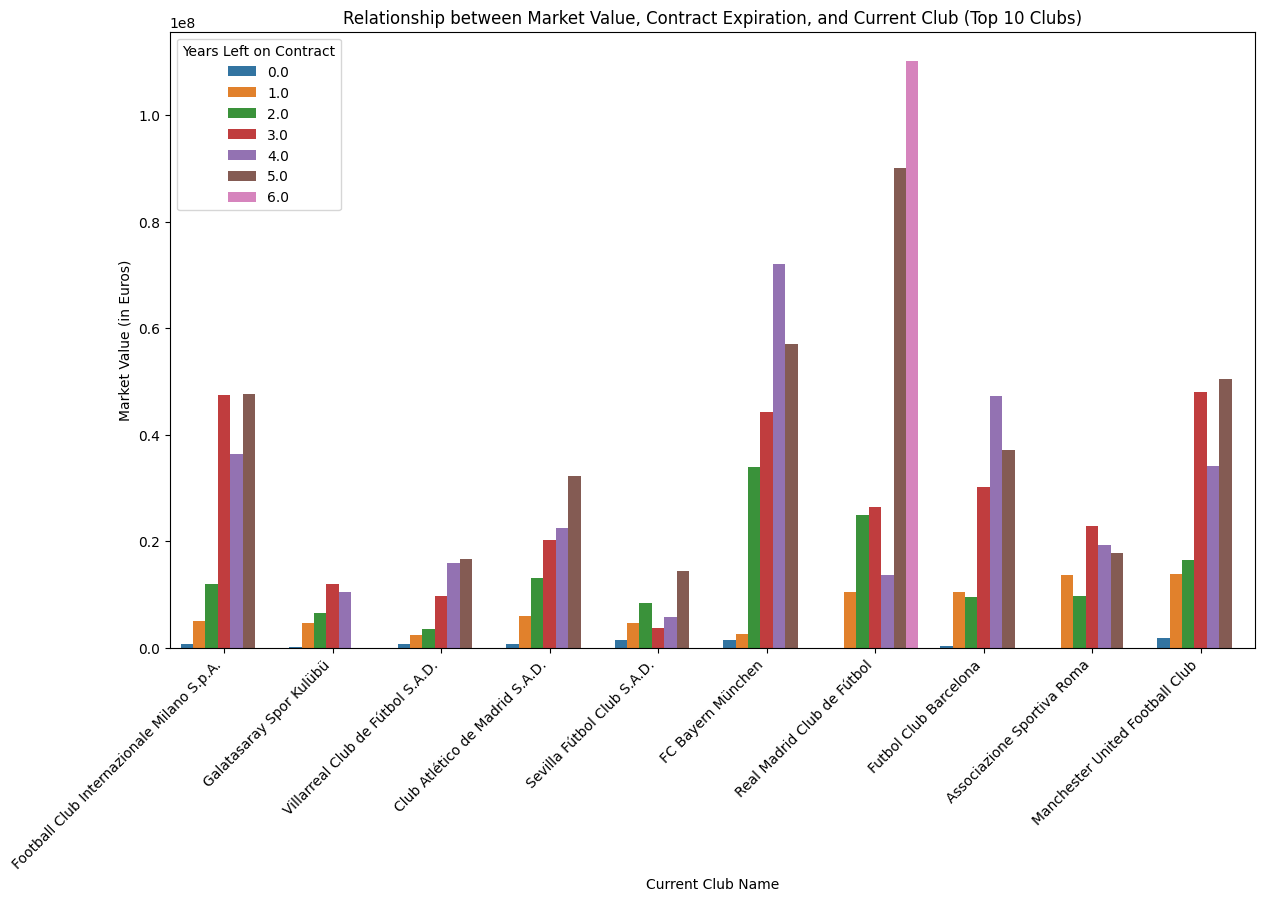

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# same the step we did above
top_10_clubs = df_integrated['current_club_name'].value_counts().head(10).index

# Filter the DataFrame for the top 10 clubs
df_top_10_clubs = df_integrated[df_integrated['current_club_name'].isin(top_10_clubs)]

# Create a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='current_club_name', y='market_value_in_eur', hue='years_left_on_contract', data=df_top_10_clubs, ci=None)

# Add labels and title
plt.xlabel('Current Club Name')
plt.ylabel('Market Value (in Euros)')
plt.title('Relationship between Market Value, Contract Expiration, and Current Club (Top 10 Clubs)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.legend(title='Years Left on Contract')

plt.show()


### Insights on the visulization of research Q2
The grouped bar chart visually captures the relationship between a player's market value, their contract expiration date, and their current club name for the top 10 clubs. The chart illustrates how market values vary across different clubs, with each club represented by a distinct bar and further segmented by colors indicating the years left on players' contracts. and as you can see the more the years left in your contract the more your more the market value is and also reveals that the club name also has and impact on the market value as you can see that their is some clubs has the same left years in their contract to expire but their players market value.


## Mina Ehab merge(player_Valution,game_lineups)

### Reserch questions
3-The relationship between market value and position ('Goalkeeper', 'Attacking Midfield', 'Defensive Midfield', 'Centre-Back', and 'Attack') with consideration
of the type ?

4- impact of domestic competition and player type on market value?

In [ ]:
df_game_lineups = pd.read_csv("/content/game_lineups.csv", low_memory=False)
df_player_valuations = pd.read_csv("/content/player_valuations.csv")

In [ ]:
df_game_lineups

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,1715ec342bf902522b69322a036a3f29,3606208,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper
1,baa0d6827dab4fab07d8dc1604e720a7,3606208,338,starting_lineup,15,264372,Viktor Tsygankov,0,Right Winger
2,ef88b1c4d61884ed8a5b2640d05a2dcd,3606208,338,starting_lineup,14,257740,Carlos de Pena,0,Left Winger
3,3b0a25b9c76eedd7f6faaec061abf671,3606208,338,starting_lineup,29,167722,Vitaliy Buyalskyi,0,Attacking Midfield
4,cb6eeedb9f728570615d37b6fe7facaf,3606208,338,starting_lineup,10,368611,Mykola Shaparenko,0,Central Midfield
...,...,...,...,...,...,...,...,...,...
140754,668295b9897fb754ffaccd15157f657a,4244600,2462,substitutes,40,167724,Diogo Barbosa,0,Left-Back
140755,e9b8a34f0f8501d0075c43b818470603,4244600,2462,substitutes,44,53226,David Braz,0,Centre-Back
140756,db22e8717f42821db51c50d3b3cbb53f,4244600,2462,substitutes,4,273236,Marlon,0,Centre-Back
140757,e4b901dcf77611af04614cba6a389fe1,4244600,2462,substitutes,22,841263,Pedro Rangel,0,Goalkeeper


In [ ]:
df_player_valuations

,player_id,date,datetime,dateweek,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,2000-01-20 00:00:00,2000-01-17,150000,3057,BE1
1,342216,2001-07-20,2001-07-20 00:00:00,2001-07-16,100000,1241,SC1
2,3132,2003-12-09,2003-12-09 00:00:00,2003-12-08,400000,126,TR1
3,6893,2003-12-15,2003-12-15 00:00:00,2003-12-15,900000,984,GB1
4,10,2004-10-04,2004-10-04 00:00:00,2004-10-04,7000000,398,IT1
...,...,...,...,...,...,...,...
463911,927768,2023-12-22,2023-12-22 00:00:00,2023-12-18,2000000,2687,ES1
463912,937958,2023-12-22,2023-12-22 00:00:00,2023-12-18,60000000,131,ES1
463913,991268,2023-12-22,2023-12-22 00:00:00,2023-12-18,20000000,1108,ES1
463914,1013774,2023-12-22,2023-12-22 00:00:00,2023-12-18,1000000,3302,ES1


## Date integration

In [ ]:
# Merge DataFrames on 'player_id'
merged_df = pd.merge(df_game_lineups, df_player_valuations, on='player_id', how='inner')

merged_df.head()

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position,date,datetime,dateweek,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,1715ec342bf902522b69322a036a3f29,3606208,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,2008-11-17,2008-11-17 00:00:00,2008-11-17,25000,53646,UKR1
1,1715ec342bf902522b69322a036a3f29,3606208,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,2008-12-10,2008-12-10 00:00:00,2008-12-08,100000,53646,UKR1
2,1715ec342bf902522b69322a036a3f29,3606208,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,2008-12-30,2008-12-30 00:00:00,2008-12-29,150000,53646,UKR1
3,1715ec342bf902522b69322a036a3f29,3606208,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,2009-08-21,2009-08-21 00:00:00,2009-08-17,350000,53646,UKR1
4,1715ec342bf902522b69322a036a3f29,3606208,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,2010-02-18,2010-02-18 00:00:00,2010-02-15,1000000,53646,UKR1


### Drop unused columns

In [ ]:
# List of columns to drop
columns_to_drop = ['game_lineups_id', 'game_id', 'date', 'datetime', 'dateweek']

# Drops the specified columns
merged_df_cleaned = merged_df.drop(columns=columns_to_drop)
merged_df_cleaned.head()

,club_id,type,number,player_id,player_name,team_captain,position,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,25000,53646,UKR1
1,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,100000,53646,UKR1
2,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,150000,53646,UKR1
3,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,350000,53646,UKR1
4,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper,1000000,53646,UKR1


## Data Cleaning

checking the null vales in the data

In [ ]:
import pandas as pd
# Display columns with null values
null_info_game_lineups = df_game_lineups.isnull().sum()
null_info_player_valuations = df_player_valuations.isnull().sum()

# Display columns with large null values in df_game_lineups
print(pd.DataFrame({'Null Values': null_info_game_lineups}))

# Display columns with large null values in df_player_valuations
print(pd.DataFrame({'Null Values': null_info_player_valuations}))


                 Null Values
game_lineups_id            0
game_id                    0
club_id                    0
type                       0
number                     0
player_id                  0
player_name                0
team_captain               0
position                   0
                                     Null Values
player_id                                      0
date                                           0
datetime                                       0
dateweek                                       0
market_value_in_eur                            0
current_club_id                                0
player_club_domestic_competition_id            0


Based om the findings there is no null values in both csv files

Duplicates remove rows

In [ ]:
# before removing duplicates
print("Shape before removing duplicates:", merged_df.shape)

# Remove duplicated rows
merged_df_no_duplicates = merged_df.drop_duplicates()

#  after removing duplicates
print(merged_df_no_duplicates.shape)

Shape before removing duplicates: (1892725, 15)
Shape after removing duplicates: (1892725, 15)


no duplicates available

## Research question 3

check the min value of the market_value and the max so we can chooce our bins

In [ ]:
# Find the minimum and maximum market values
min_market_value = merged_df['market_value_in_eur'].min()
max_market_value = merged_df['market_value_in_eur'].max()

# Display the results
print("Minimum Market Value: {}".format(min_market_value))
print("Maximum Market Value: {}".format(max_market_value))


Minimum Market Value: 10000
Maximum Market Value: 200000000


<ipython-input-67-9936d34700c3>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='position', y='market_value_in_eur', hue='type', data=filtered_df, ci=None)


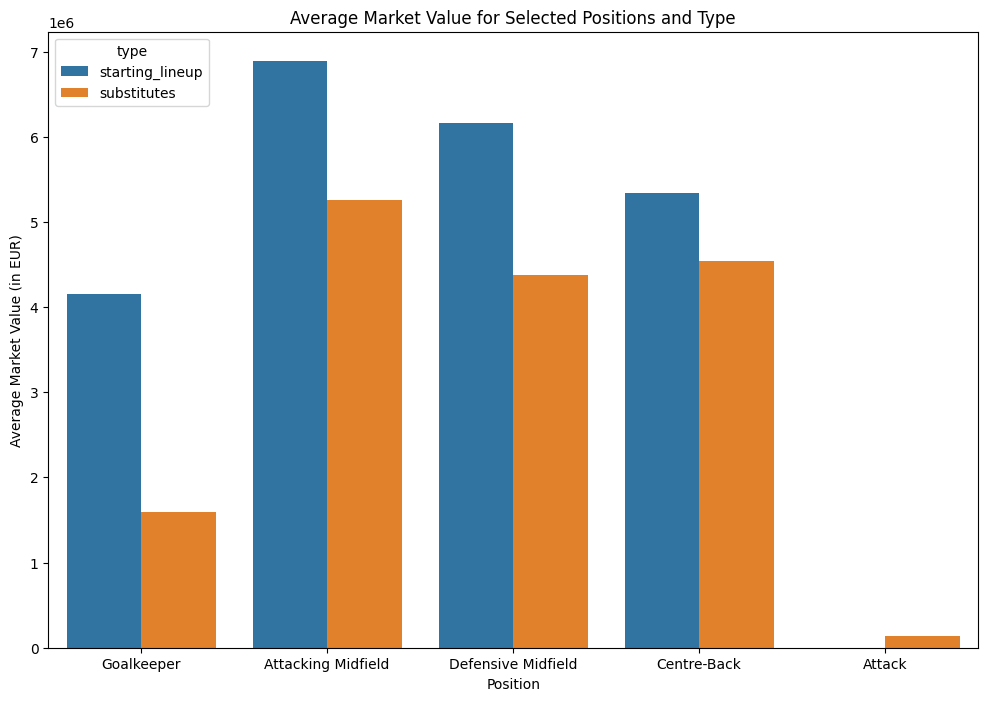

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for specific positions
selected_positions = ['Goalkeeper', 'Attacking Midfield', 'Defensive Midfield', 'Centre-Back', 'Attack']
filtered_df = merged_df[merged_df['position'].isin(selected_positions)]

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='position', y='market_value_in_eur', hue='type', data=filtered_df, ci=None)

# Set labels and title
plt.xlabel('Position')
plt.ylabel('Average Market Value (in EUR)')
plt.title('Average Market Value for Selected Positions and Type')

# Show the plot
plt.show()


## Insights
The bar plot visualizes the average market values (in EUR) for specific football positions, namely 'Goalkeeper,' 'Attacking Midfield' 'Defensive Midfield,','Centre-Back,' and 'Attack,' with a breakdown by type starting_lineup and subsitutes.As you can see from the plot that the attacking midfields has the highest market value especially if they are starting lineups and the goal keepers tends to have the lowest market value even if he is at the starting lineups so what we can understand from the plot that the starting linups is directly propotion to the market value and the subsitutes is inversly propotion meaning that if the market value decrease that means you are a subsitute and vise verse findings ranking based on market value and type starting linups 1- attacking midfield 2- defensive midfield 3-center back 4- goal keeper 5- attacking findings ranking based on market value and type subsitutes 1-attacking midfield 2-center back 3-defensive midfield 4- goal keeper 5- attack

## Research Question 4

<ipython-input-72-96027f1c5a7c>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='player_club_domestic_competition_id', y='market_value_in_eur', hue='type', data=merged_df, ci=None, palette='viridis')


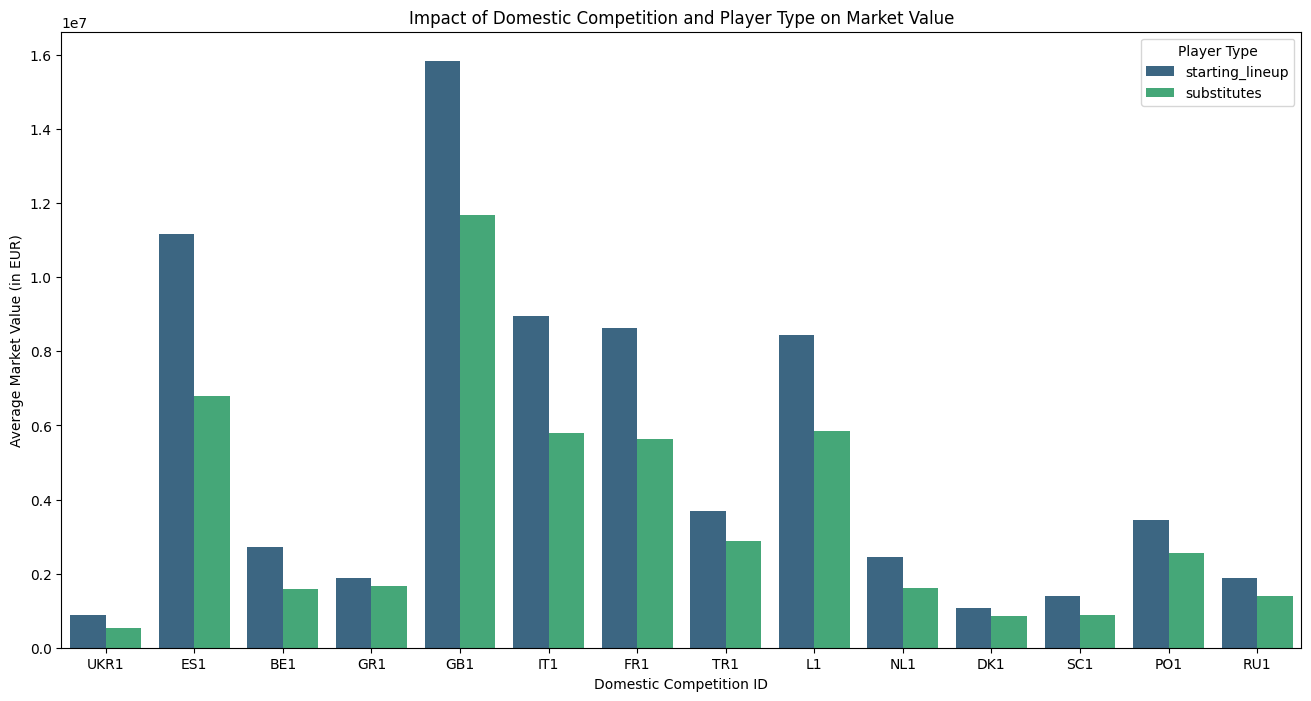

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(16, 8))

# Create a clustered bar plot
sns.barplot(x='player_club_domestic_competition_id', y='market_value_in_eur', hue='type', data=merged_df, ci=None, palette='viridis')

# Set labels and title
plt.xlabel('Domestic Competition ID')
plt.ylabel('Average Market Value (in EUR)')
plt.title('Impact of Domestic Competition and Player Type on Market Value')

# Show the legend
plt.legend(title='Player Type', loc='upper right')

# Show the plot
plt.show()


## Insights
The clustered bar plot provides a comprehensive overview of the relationship between a player's club's domestic competition, the player's type, and their average market value. based on the findings of the plot you can see that the domenstic competition has high influnce on the market value as there are some competitons increase the market value of player like GB1 and ES1 and on the other hand there are other competitions have make players to have less  market value of course the market value and type starting line ups are directly proportional and the market value and subsitutes type are inversely proportional and also as you can see that the higher the market value of the players in the domenstic competiton the higher the player type is subsitute and finally the domenstic competitons that have a high player market values has more number of players